In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio1 ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/Other Tries/Samples/jano1.wav'
audio2 ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/Other Tries/Samples/talk.wav'
audio3 ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/Other Tries/Samples/solo.wav'

In [ ]:
import numpy as np
from scipy import signal
import librosa  # for audio reading

# Function to read audio file
def read_audio(filename):
    audio, _ = librosa.load(filename, sr=None)
    return audio

# Read the audio signals from the respective files
s1 = read_audio(audio1)
s2 = read_audio(audio2)
s3 = read_audio(audio3)

# For demonstration, making all signals of the same length
min_length = min(len(s1), len(s2), len(s3))
s1, s2, s3 = s1[:min_length], s2[:min_length], s3[:min_length]

# Combine signals into a single matrix
S = np.c_[s1, s2, s3]

# Add noise to the signals
S += 0.2 * np.random.normal(size=S.shape)

# Standardize the signals
S /= S.std(axis=0)

# Define the mixing matrix
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])

# Generate observations (mixed signals)
X = np.dot(S, A.T)


In [ ]:
from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

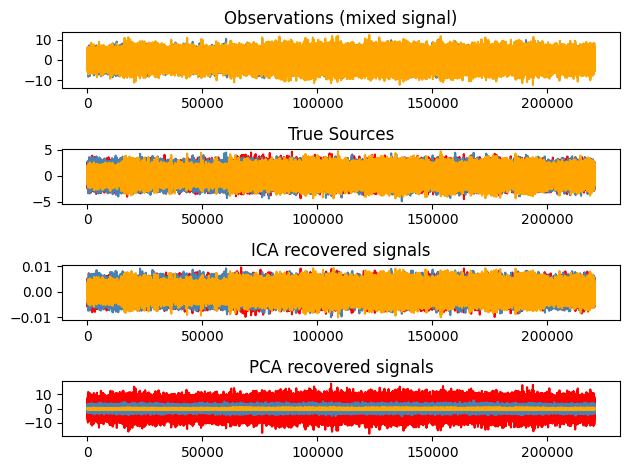

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
# Assuming a sample rate of 44100 Hz for all signals. Adjust as needed.
sample_rate = 44100

# Display the mixed signals (X)
print("Playing Observations (Mixed Signals)")
for idx, sig in enumerate(X.T):
    print(f"Signal {idx+1}")
    display(Audio(sig, rate=sample_rate))

# Display the ICA recovered signals (S_)
print("\nPlaying ICA Recovered Signals")
for idx, sig in enumerate(S_.T):
    print(f"Signal {idx+1}")
    display(Audio(sig, rate=sample_rate))

# Display the PCA recovered signals (H)
print("\nPlaying PCA Recovered Signals")
for idx, sig in enumerate(H.T):
    print(f"Signal {idx+1}")
    display(Audio(sig, rate=sample_rate))


Output hidden; open in https://colab.research.google.com to view.